In [1]:
from WebScrapping.Twint import TwintScrapper
from DataProcessing.NLP import NLP
from DataVisualization.GraphGenerator import GraphGenerator
import nest_asyncio
nest_asyncio.apply()

/home/usuario/.local/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## This Notebook is to demostrate how the MainHanddler.py file would work, the problems is that when you run it from the terminal it gives an error that has to be with the Date format, but here works just fine.

In [2]:
# Create a Twint Scrapper object
# Currently if we run the file MainScrapping.py it gives an error with dates, currently looking how to fix it

scrapper = TwintScrapper()

In [3]:
# Define our search parameters
user = "POTUS"
start_date = "2021-08-01"
end_sate = "2021-08-04"

### First we're going to fetch data from the posts and replies

In [4]:
# Create post Data Frame
biden_posts = scrapper.search_user_posts(user, start_date, end_sate, False)
biden_posts.head(10)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


,id,conversation_id,date,tweet,nretweets,nlikes,nreplies
0,1422708314991910912,1422708314991910912,2021-08-03 18:57:49,"Better roads and a faster, smoother, safer com...",1316,8485,1067
1,1422702063025336321,1422702063025336321,2021-08-03 18:32:59,"This afternoon, the Vice President and I met w...",1396,9923,1171
2,1422694251247374343,1422694251247374343,2021-08-03 18:01:56,We’re doing everything we can to get more peop...,3329,27466,1768
3,1422660761797763073,1422660761797763073,2021-08-03 15:48:52,"Right now, too many people are dying — or watc...",9646,60228,3283
4,1422656015514939404,1422656015514939404,2021-08-03 15:30:00,Tune in as I give an update on our progress to...,748,3791,750
5,1422631978554245124,1422631978554245124,2021-08-03 13:54:29,It’s no secret that I love Amtrak. It’s one of...,2981,21345,1433
6,1422613028676177927,1422613028676177927,2021-08-03 12:39:11,"This Black Women’s Equal Pay Day, we must reco...",2147,10191,1415
7,1422587817453133824,1422587817453133824,2021-08-03 10:59:00,Americans shouldn’t be losing hours of their l...,4611,50099,2446
8,1422573712033910786,1422573712033910786,2021-08-03 10:02:57,To the families of the 23 souls lost two years...,1542,8905,574
9,1422550181166387201,1422550181166387201,2021-08-03 08:29:27,When the United States Capitol and our very de...,5575,43072,1906


In [5]:
# Create replies Data Frame
biden_replies = scrapper.search_replies_to(user, start_date, end_sate, False, "")

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [6]:
biden_replies.head(10)

,conversation_id,tweet,name
0,1422708314991910912,@POTUS Bipartisan means in India 🇮🇳 servent wo...,Harsh Kumar
1,1422708314991910912,"@POTUS Good ways and fast travel, smooth, secu...",Bad Biden Translations
2,1422708853054087174,@POTUS WHY ARE YOU ALLOWING UNVACCINATED MIGRA...,Lainey Marie
3,1422708314991910912,@POTUS Jamaica 🇯🇲 is that you?? 👀,MG11
4,1422708314991910912,@POTUS Please lift #liftthetravelban 🙏🙏,sharon gannon. 🏳️‍🌈
5,1422659659555540992,@POTUS Global population: 7.8 billion.,Bo Laurent
6,1422708314991910912,@POTUS 👍🇺🇸,HARVEY
7,1422708314991910912,@POTUS It's done! Glory to God.,@ImbuhilaProf
8,1422708314991910912,@POTUS Please make sure that there are wildlif...,Alexander Smith
9,1422536863819120644,@POTUS Business Fact: people who say “you can’...,Paul Arrowood


In [7]:
biden_replies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30211 entries, 0 to 30210
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  30211 non-null  object
 1   tweet            30211 non-null  object
 2   name             30211 non-null  object
dtypes: object(3)
memory usage: 708.2+ KB


### The next step is to "normalize" the replies and posts Data Frame
### We're going to do the sentiment analysis and count how many positive, negative and neutral comments are for each post
### Also, we're going to try and guess as many people's gender as possible, since the library that is used is not completely accurate for Data Frames that containg a varity of people from different countries

In [8]:
scrapper.clean_df_replies(biden_replies)
biden_replies

,conversation_id,tweet,name,gender,sentiment
0,1422708314991910912,Bipartisan means in India 🇮🇳 servent working ...,Harsh Kumar,unknown,Neutral
1,1422708314991910912,"Good ways and fast travel, smooth, secure - t...",Bad Biden Translations,unknown,Positive
2,1422708853054087174,WHY ARE YOU ALLOWING UNVACCINATED MIGRANTS IN...,Lainey Marie,unknown,Positive
3,1422708314991910912,Jamaica 🇯🇲 is that you?? 👀,MG11,unknown,Neutral
4,1422708314991910912,Please lift 🙏🙏,sharon gannon. 🏳️‍🌈,unknown,Neutral
...,...,...,...,...,...
30206,1421621796810465291,,Susan A Hanlon,female,Neutral
30207,1421571439405187076,Kabir is the Almighty God The great men...,Khushbu Singh🏳️🇮🇳🇮🇳,unknown,Positive
30208,1420882077524844551,I have friends that received the shots and st...,John AMERICA,male,Neutral
30209,1421607861537447937,"Dear President, please save Myanmar!",임백령-분단적폐당파양극타파,unknown,Neutral


In [9]:
scrapper.clean_df_posts(biden_posts, biden_replies)
biden_posts.head()

,id,conversation_id,date,tweet,nretweets,nlikes,nreplies,males_count,females_count,unknown_count,positives_com,negatives_com,neutral_com,coef_acceptation
0,1422708314991910912,1422708314991910912,2021-08-03 18:57:49,"Better roads and a faster, smoother, safer com...",1316,8485,1067,13,1,45,21,7,441,0.0
1,1422702063025336321,1422702063025336321,2021-08-03 18:32:59,"This afternoon, the Vice President and I met w...",1396,9923,1171,44,8,106,52,19,441,0.0
2,1422694251247374343,1422694251247374343,2021-08-03 18:01:56,We’re doing everything we can to get more peop...,3329,27466,1768,78,54,206,117,42,441,0.0
3,1422660761797763073,1422660761797763073,2021-08-03 15:48:52,"Right now, too many people are dying — or watc...",9646,60228,3283,251,130,515,262,183,441,0.0
4,1422656015514939404,1422656015514939404,2021-08-03 15:30:00,Tune in as I give an update on our progress to...,748,3791,750,58,37,133,65,46,441,0.0


## Next step is vizualise our data

In [10]:
# We're just going to plot how many Neutral, Positive and Negative comments are
graphGenerator = GraphGenerator()

In [11]:
import pandas as pd

In [12]:
sentiment_comments = biden_replies['sentiment'].value_counts()

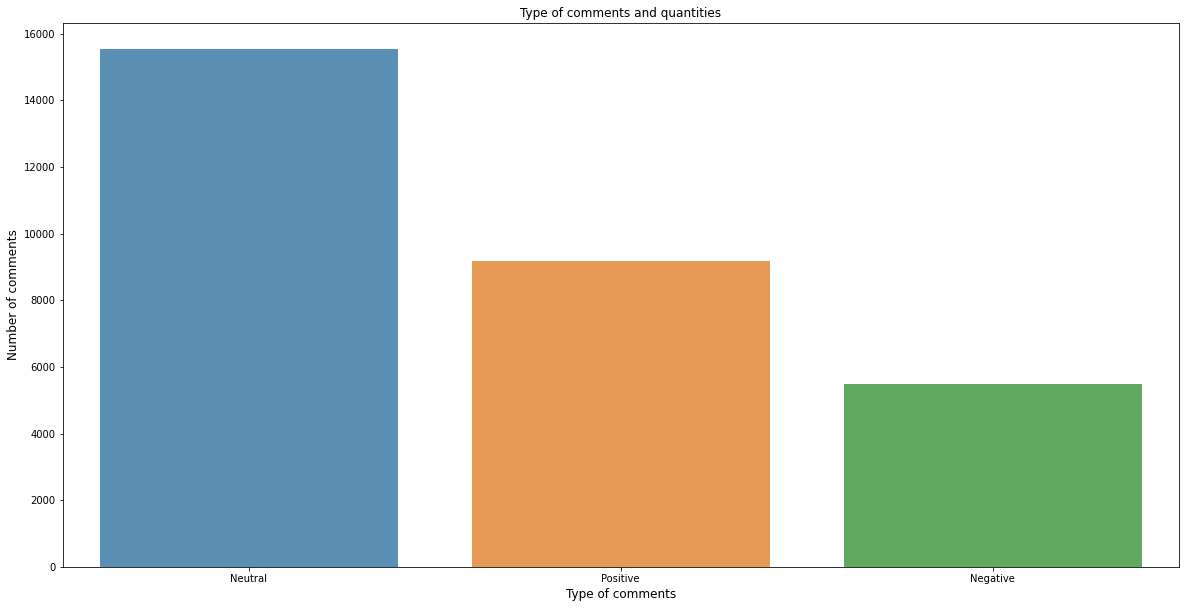

In [13]:
graphGenerator.create_graph_bar(sentiment_comments.index, sentiment_comments.values, "Type of comments and quantities", "Type of comments", "Number of comments")

In [14]:
# Now we are going to see wich are the most frequent words in the comments
nlp_processor = NLP('english')

In [17]:
words_frequency = nlp_processor.get_top_frequecy_dictionary(biden_replies, 1000)
words_frequency

FreqDist({'map': 261, 'wrong': 245, 'vaccin': 146, 'get': 141, 'peopl': 125, 'morocco': 100, 'presid': 79, 'us': 63, 'crimea': 61, 'kosovo': 60, ...})

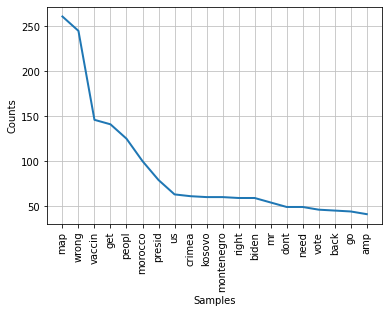

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
words_frequency.plot(20)

In [19]:
top_org = nlp_processor.get_most_mentioned_organizations(5, 1000, biden_replies)

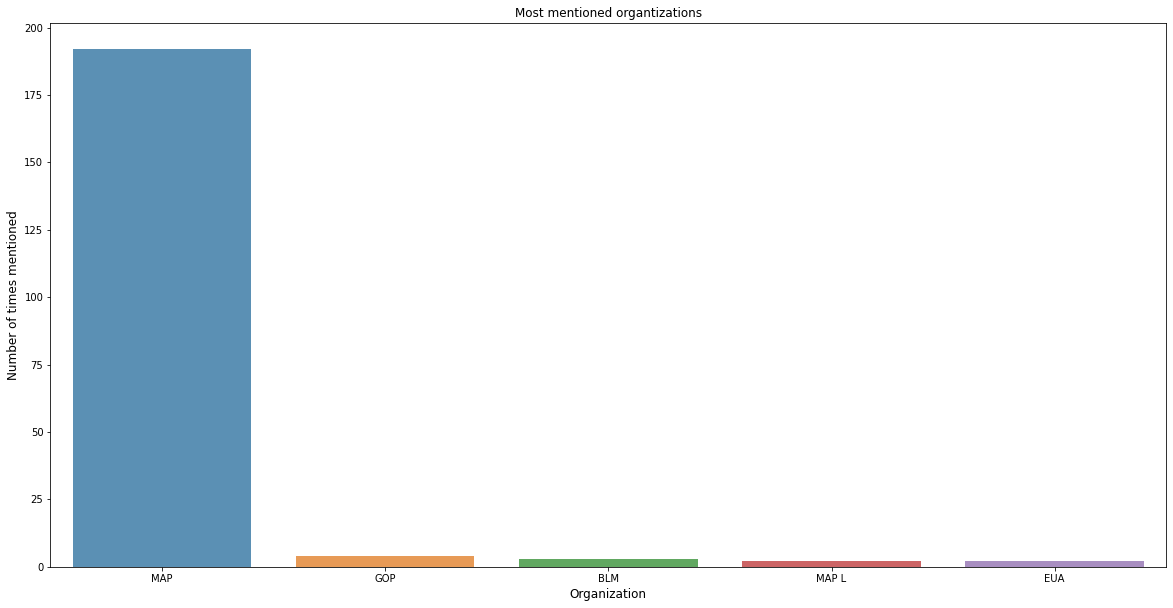

In [20]:
# Plot most mentioned organizations
graphGenerator.create_graph_bar(top_org.index, top_org.values, "Most mentioned organtizations", "Organization", "Number of times mentioned")

In [21]:
# Now we're going to do the same analysis, but for the Posts Data Frame
words_frequency_posts = nlp_processor.get_top_frequecy_dictionary(biden_posts, 1000)

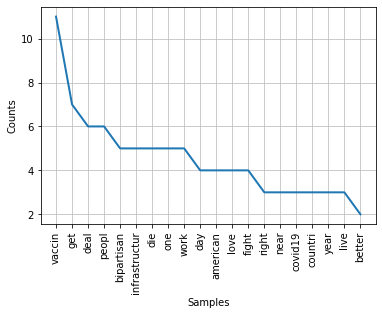

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
words_frequency_posts.plot(20)

In [27]:
top_org_posts = nlp_processor.get_most_mentioned_organizations(5, 5, biden_posts)

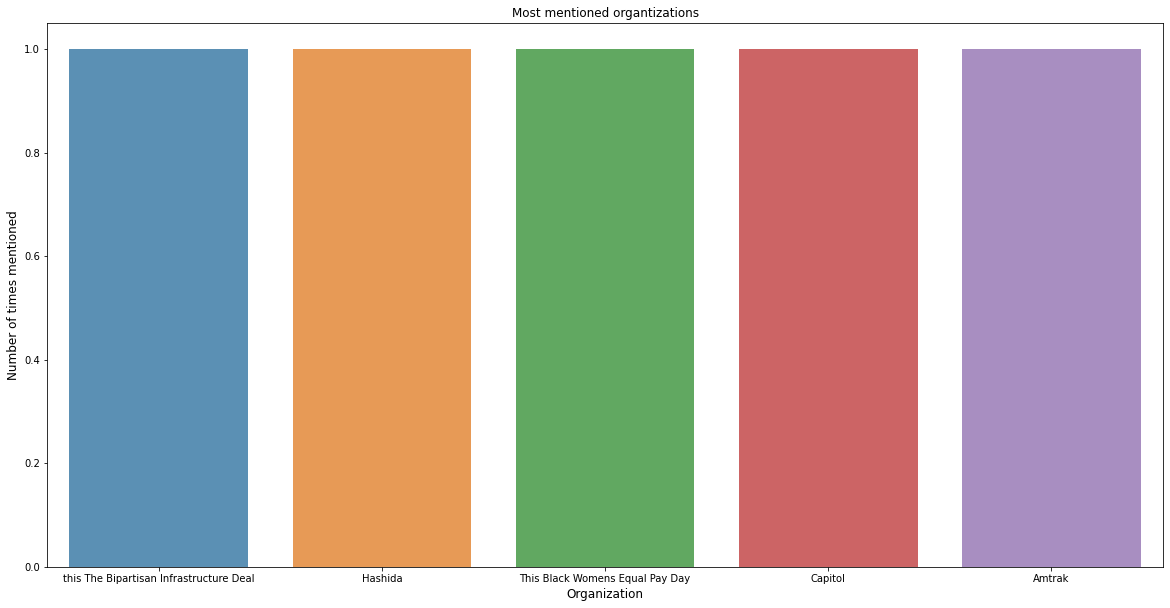

In [26]:
graphGenerator.create_graph_bar(top_org_posts.index, top_org_posts.values, "Most mentioned organtizations", "Organization", "Number of times mentioned")

## Finally let's compare data from two different users that that work on the same thing

In [35]:
user1 = "taylorswift13"
user2 = "ArianaGrande"
start_date = "2021-07-01"
end_date = "2021-07-10"

### First let's fetch both replies and posts Data Frames

In [36]:
taylor_posts = scrapper.search_user_posts(user1, start_date, end_date, False)
taylor_posts.head()

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


,id,conversation_id,date,tweet,nretweets,nlikes,nreplies
0,1411038296071827462,1411038296071827462,2021-07-02 14:05:20,You wouldn’t be the first renegade to need som...,28464,189899,7608
1,1410813373307105281,1410813373307105281,2021-07-01 23:11:34,"When @Aaron_Dessner came into my life, I was u...",40795,187704,10698


In [37]:
ariana_posts = scrapper.search_user_posts(user2, start_date, end_date, False)
ariana_posts

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


,id,conversation_id,date,tweet,nretweets,nlikes,nreplies
0,1413140961123737623,1413140961123737623,2021-07-08 09:20:34,🤍🖼🪴🧚🏼‍♂️,15121,187298,5667
1,1412804001691697164,1412804001691697164,2021-07-07 11:01:37,safety net performance / live music video out ...,25076,105568,6294
2,1412803504855453700,1412803504855453700,2021-07-07 10:59:38,trippin falllinnnnn,30367,293913,10840
3,1412803402371829766,1412803402371829766,2021-07-07 10:59:14,1 min,6285,86358,3878
4,1412441250070876160,1412441250070876160,2021-07-06 11:00:10,safety net tomorrow @vevo @tydollasign 🤍 http...,36853,273890,14438
5,1412078865497817095,1412078865497817095,2021-07-05 11:00:11,which song do you think is next @vevo? https:...,26854,328997,22589
6,1410663591292719108,1410663591292719108,2021-07-01 13:16:23,thank you @betterhelp 🤍,5912,70717,3784


In [38]:
taylor_replies = scrapper.search_replies_to(user1, start_date, end_date, False, "")

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [39]:
ariana_replies = scrapper.search_replies_to(user2, start_date, end_date, False, "")

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [40]:
taylor_replies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14602 entries, 0 to 14601
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  14602 non-null  object
 1   tweet            14602 non-null  object
 2   name             14602 non-null  object
dtypes: object(3)
memory usage: 342.4+ KB


In [41]:
ariana_replies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63704 entries, 0 to 63703
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   conversation_id  63704 non-null  object
 1   tweet            63704 non-null  object
 2   name             63704 non-null  object
dtypes: object(3)
memory usage: 1.5+ MB


### We can see that since Ariana posted a lot more, she has more replies than Taylor

#### Now we normalize every Data Frame

In [42]:
scrapper.clean_df_replies(taylor_replies)
scrapper.clean_df_replies(ariana_replies)
scrapper.clean_df_posts(taylor_posts, taylor_replies)
scrapper.clean_df_posts(ariana_posts, ariana_replies)

## Next we do the sentiment analysis and compare it

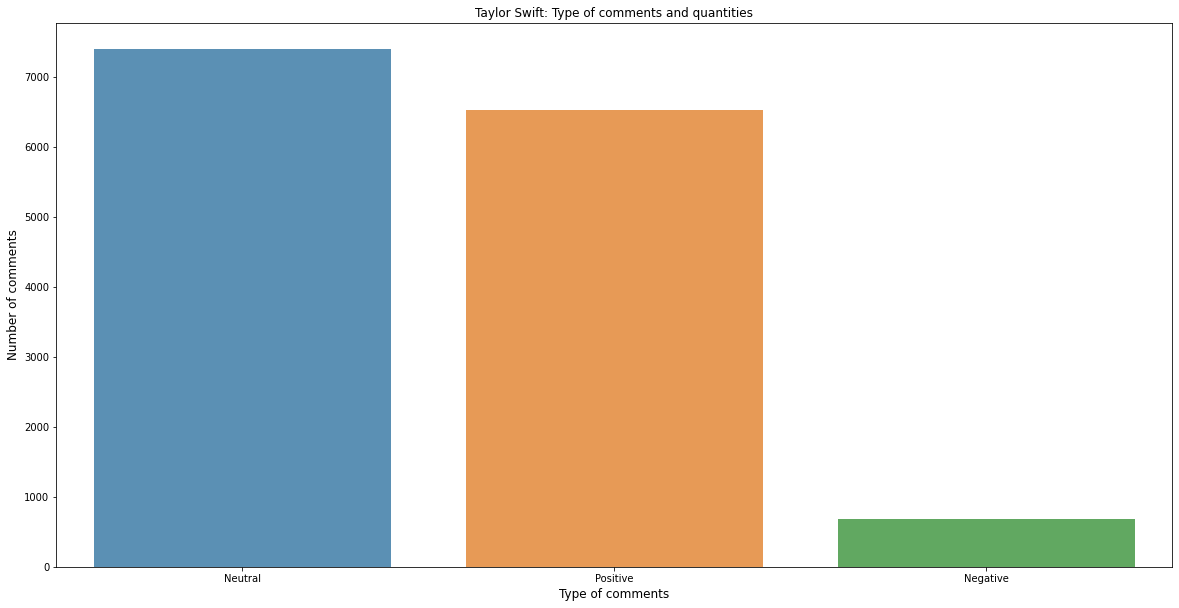

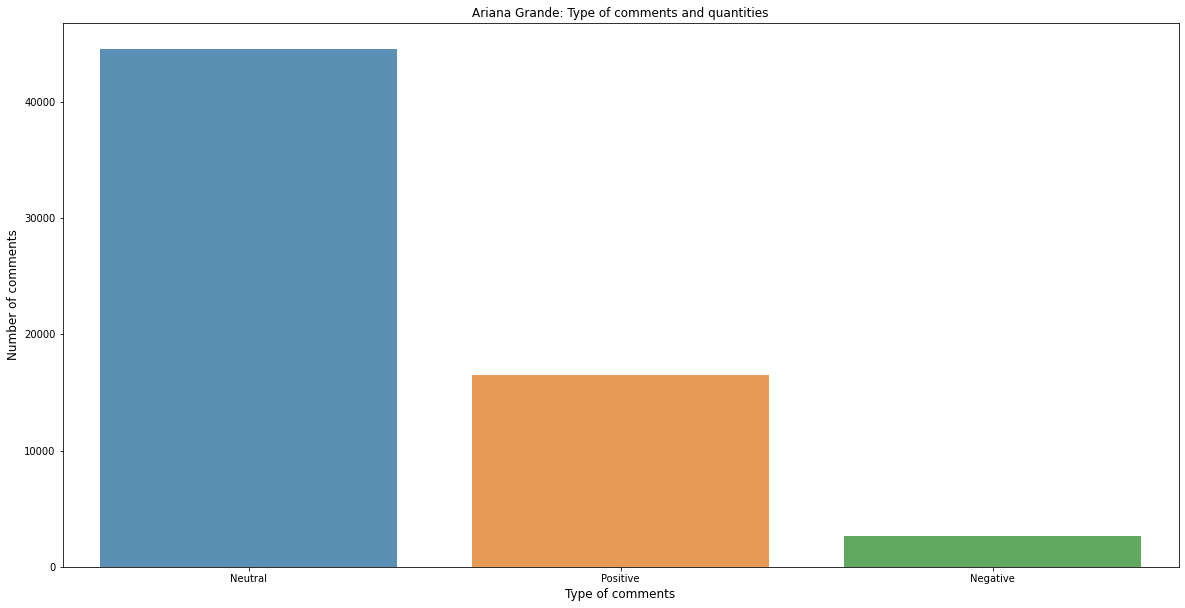

In [44]:
sentiment_comments_taylor = taylor_replies['sentiment'].value_counts()
sentiment_comments_ariana = ariana_replies['sentiment'].value_counts()

graphGenerator.create_graph_bar(sentiment_comments_taylor.index, sentiment_comments_taylor.values, "Taylor Swift: Type of comments and quantities", "Type of comments", "Number of comments")
graphGenerator.create_graph_bar(sentiment_comments_ariana.index, sentiment_comments_ariana.values, "Ariana Grande: Type of comments and quantities", "Type of comments", "Number of comments")

### We can see that both have mostly positive and neutral comments, it is what is desired since Taylor and Ariana are such famous singers

## Finally let's look at the  most frequent words and the organizations more mentioned

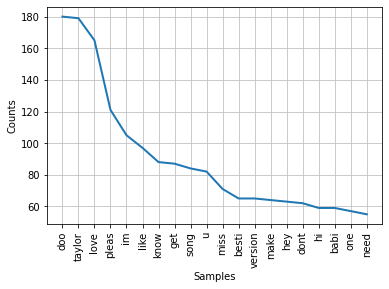

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [45]:
words_frequency_taylor_replies = nlp_processor.get_top_frequecy_dictionary(taylor_replies, 2000)
words_frequency_taylor_replies.plot(20)

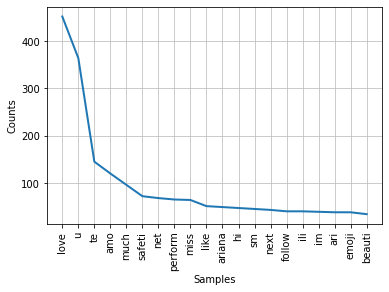

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
words_frequency_ariana_replies = nlp_processor.get_top_frequecy_dictionary(ariana_replies, 2000)
words_frequency_ariana_replies.plot(20)

## We can see that for both, there are just positive words

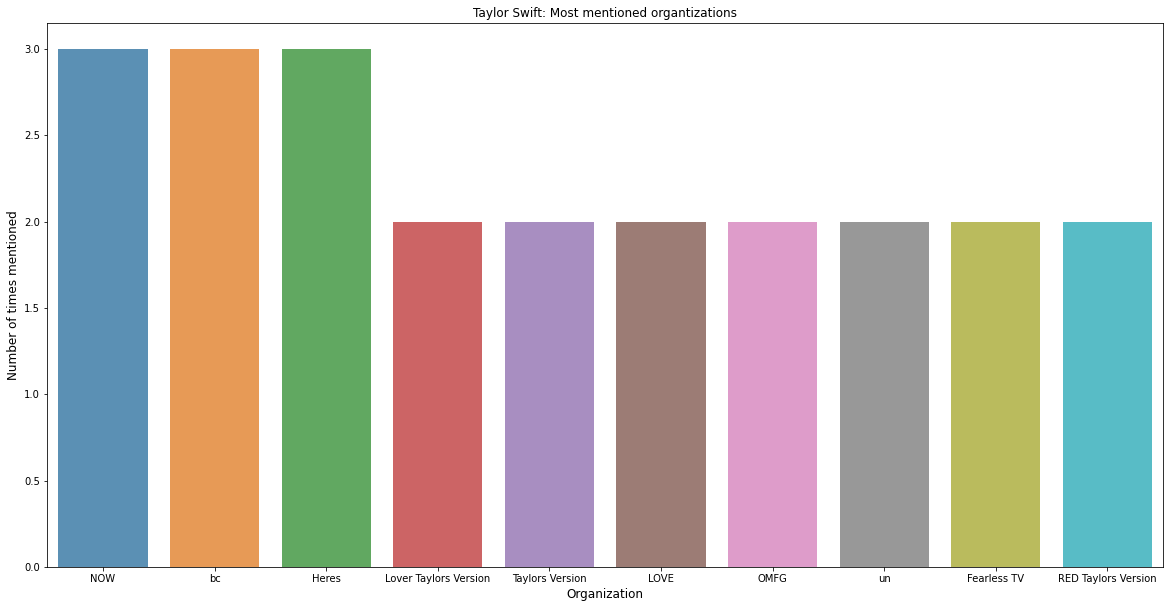

In [47]:
top_org_taylor_replies = nlp_processor.get_most_mentioned_organizations(10, 2000, taylor_replies)
graphGenerator.create_graph_bar(top_org_taylor_replies.index, top_org_taylor_replies.values, "Taylor Swift: Most mentioned organtizations", "Organization", "Number of times mentioned")

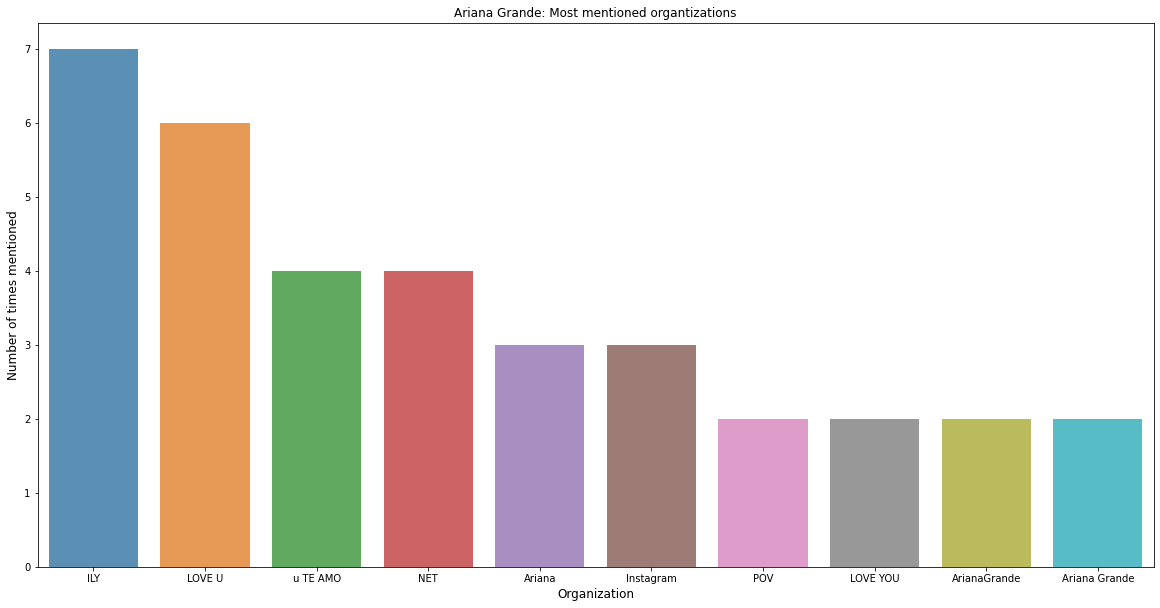

In [49]:
top_org_ariana_replies = nlp_processor.get_most_mentioned_organizations(10, 2000, ariana_replies)
graphGenerator.create_graph_bar(top_org_ariana_replies.index, top_org_ariana_replies.values, "Ariana Grande: Most mentioned organtizations", "Organization", "Number of times mentioned")